In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("stp_lm.csv")
df.dropna(inplace=True)

In [ ]:
 df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

after drop duplicates (49823, 2)


In [ ]:
 df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

after drop duplicates (49823, 2)


In [ ]:
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df.head(10)
df.shape

<ipython-input-11-e0642c75b29a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


(49823, 2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')
X = vectorizer.fit_transform(df.Tweet)

In [ ]:
y = df["Label"].values

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y,shuffle = True)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42349, 54086), (42349,), (7474, 54086), (7474,))

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=101)
X_train,y_train = os.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((182120, 54086), (182120,), (7474, 54086), (7474,))

In [ ]:
from sklearn.svm import SVC
clf = SVC()
#clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.25      0.90      0.39      1607
           1       0.28      0.09      0.14       789
           2       0.42      0.34      0.38       783
           3       0.24      0.02      0.03       432
           4       0.57      0.20      0.30       377
           5       0.07      0.00      0.01       346
           6       0.28      0.03      0.05       306
           7       0.41      0.07      0.13       282
           8       0.24      0.03      0.05       268
           9       0.19      0.01      0.02       250
          10       0.11      0.01      0.02       231
          11       0.67      0.36      0.47       228
          12       0.43      0.22      0.29       219
          13       0.25      0.00      0.01       202
          14       0.25      0.00      0.01       206
          15       0.46      0.03      0.06       187
          16       0.25      0.01      0.01       196
          17       0.62    

In [ ]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Doğru Etiketler')
    plt.xlabel('Tahmnin Etiketleri')
    plt.tight_layout()

Normalized confusion matrix


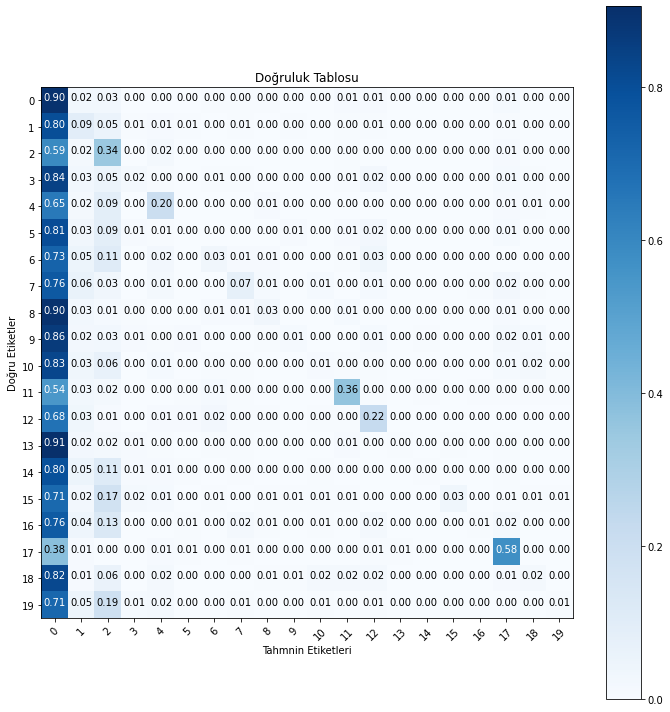

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

plot_confusion_matrix(cm, [i for i in range(20)] ,title='Doğruluk Tablosu', normalize=True)